In [2]:
import numpy as np

csv_path = "mtfuji_data.csv" # Specify the file name (path)

np.set_printoptions(suppress=True) # Set prohibition of scientific notation
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)

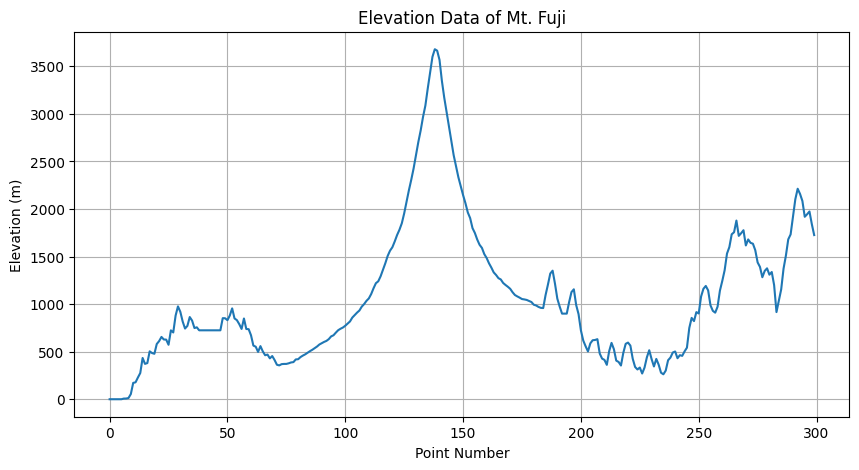

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1: Data visualization
plt.figure(figsize=(10, 5))
plt.plot(fuji[:, 0], fuji[:, 3])
plt.title('Elevation Data of Mt. Fuji')
plt.xlabel('Point Number')
plt.ylabel('Elevation (m)')
plt.grid(True)
plt.show()

In [4]:
# Problem 2: Function to calculate gradient at a certain point
def calculate_gradient(point_number):
    current_point = fuji[point_number]
    next_point = fuji[point_number - 1]
    gradient = (current_point[3] - next_point[3]) / (current_point[0] - next_point[0])
    return gradient

In [5]:
# Problem 3: Function to calculate destination point
def calculate_destination(current_point, alpha=0.2):
    gradient = calculate_gradient(current_point[0])
    destination = current_point[0] - alpha * gradient
    destination = round(destination)
    if destination < 0:
        destination = 0
    return fuji[destination]

In [6]:
# Problem 4: Function to go down the mountain
def descend_from_point(initial_point):
    descent_path = [initial_point]
    current_point = initial_point
    while True:
        next_point = calculate_destination(current_point)
        if next_point[0] == current_point[0]:
            break
        descent_path.append(next_point)
        current_point = next_point
    return descent_path

In [7]:
# Problem 5: Visualization of the descent process
def visualize_descent(descent_path):
    descent_path = np.array(descent_path)
    plt.figure(figsize=(10, 5))
    plt.scatter(descent_path[:, 0], descent_path[:, 3], c='r', label='Descent Path', marker='o')
    plt.plot(fuji[:, 0], fuji[:, 3], label='Elevation Data')
    plt.title('Descent Process from Mt. Fuji')
    plt.xlabel('Point Number')
    plt.ylabel('Elevation (m)')
    plt.legend()
    plt.grid(True)
    plt.show()

In [12]:
def calculate_gradient(point_number):
    print("Point number data type:", type(point_number))  # Debugging print
    current_point = fuji[point_number]
    next_point = fuji[point_number - 1]
    gradient = (current_point[3] - next_point[3]) / (current_point[0] - next_point[0])
    return gradient
calculate_gradient(10)

Point number data type: <class 'int'>


117.15

In [13]:
def calculate_gradient(point_number):
    print("Point number:", point_number)  # Debugging print
    print("Fuji array length:", len(fuji))  # Debugging print
    current_point = fuji[point_number]
    next_point = fuji[point_number - 1]
    gradient = (current_point[3] - next_point[3]) / (current_point[0] - next_point[0])
    return gradient
calculate_gradient(10)

Point number: 10
Fuji array length: 300


117.15

In [14]:
def calculate_gradient(point_number):
    if point_number == 0:
        return 0  # No gradient at the beginning
    elif point_number == len(fuji) - 1:
        return 0  # No gradient at the end
    else:
        current_point = fuji[point_number]
        next_point = fuji[point_number - 1]
        gradient = (current_point[3] - next_point[3]) / (current_point[0] - next_point[0])
        return gradient


In [15]:
# Problem 6: Change of initial value
initial_values = [136, 142, 150]  # Example initial values
for initial_value in initial_values:
    initial_point_index = initial_value
    print("Initial point index:", initial_point_index)  # Debugging print
    descent_path = descend_from_point(fuji[initial_point_index])  # Pass the index instead of the point
    visualize_descent(descent_path)


Initial point index: 136


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices